<a href="https://colab.research.google.com/github/Akshat13shah/data_augmentation_and_modeltraining/blob/main/Data_Augmentation_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS203 Lab Assignment 5

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232
---
* Name: Akshat Shah
* Roll No: 23110293
---

### Task 1: Data Augmentation

* Downloaded the Cat & Dog Dataset (https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?select=test) (Only download the test dataset; do not take the training dataset)

* Create a train and test set (train-test ratio should be 80:20%).


In [ ]:
!pip install --upgrade augly -q
!pip install nlpaug -q

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/test/cats') if f.endswith('.jpg')]
images = []
counter=0
cats_train=[]
cats_test=[]

for i in image_files:
    img_path = os.path.join('/content/drive/MyDrive/test/cats', i)
    img = Image.open(img_path)
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        cats_train.append(img_array)
    else:
        img_array=np.array(img)
        cats_test.append(img_array)

In [ ]:
print(img_path)

/content/drive/MyDrive/test/cats/cat_18.jpg


In [ ]:
# Specify the folder where images are stored; update this path as needed
cats = "/content/drive/MyDrive/test/cats"
dogs = "/content/drive/MyDrive/test/dogs"

# List image files with .jpg extension
cats_files = [f for f in os.listdir(cats) if f.lower().endswith('.jpg')]
dogs_files = [f for f in os.listdir(dogs) if f.lower().endswith('.jpg')]

# Create a dataframe from the list of image filenames
df_cats = pd.DataFrame(cats_files, columns=['cats_filename'])
df_cats['cats_filepath'] = df_cats['cats_filename'].apply(lambda x: os.path.join(cats, x))
df_cats['cats_filename'] = df_cats['cats_filename'].str.slice(0, -4)
df_cats['cats_pixels'] = df_cats['cats_filepath'].apply(lambda x: Image.open(x))

#
df_dogs = pd.DataFrame(dogs_files, columns=['dogs_filename'])
df_dogs['dogs_filepath'] = df_dogs['dogs_filename'].apply(lambda x: os.path.join(dogs, x))
df_dogs['dogs_filename'] = df_dogs['dogs_filename'].str.slice(0, -4)
df_dogs['dogs_pixels'] = df_dogs['dogs_filepath'].apply(lambda x: Image.open(x))

# Split the dataframe into train and test sets (80/20 split)
cats_train_df, cats_test_df = train_test_split(df_cats, test_size=0.2, random_state=42)
dogs_train_df, dogs_test_df = train_test_split(df_dogs, test_size=0.2, random_state=42)

In [ ]:
cats_train_df.to_csv('cats_train.csv', index=False)
dogs_train_df.to_csv('dogs_train.csv', index=False)
cats_test_df.to_csv('cats_test.csv', index=False)
dogs_test_df.to_csv('dogs_test.csv', index=False)

In [ ]:
len(cats_train_df),len(cats_test_df),len(dogs_train_df),len(dogs_test_df )

(56, 14, 56, 14)

In [ ]:
cats_train_df.head()

,cats_filename,cats_filepath,cats_pixels
62,cat_417,/content/drive/MyDrive/test/cats/cat_417.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,cat_156,/content/drive/MyDrive/test/cats/cat_156.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,cat_574,/content/drive/MyDrive/test/cats/cat_574.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,cat_313,/content/drive/MyDrive/test/cats/cat_313.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,cat_473,/content/drive/MyDrive/test/cats/cat_473.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
cats_test_df.head()

,cats_filename,cats_filepath,cats_pixels
22,cat_60,/content/drive/MyDrive/test/cats/cat_60.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
0,cat_430,/content/drive/MyDrive/test/cats/cat_430.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
49,cat_113,/content/drive/MyDrive/test/cats/cat_113.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,cat_147,/content/drive/MyDrive/test/cats/cat_147.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
54,cat_464,/content/drive/MyDrive/test/cats/cat_464.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
dogs_train_df.head()

,dogs_filename,dogs_filepath,dogs_pixels
62,dog_462,/content/drive/MyDrive/test/dogs/dog_462.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,dog_534,/content/drive/MyDrive/test/dogs/dog_534.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,dog_415,/content/drive/MyDrive/test/dogs/dog_415.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,dog_520,/content/drive/MyDrive/test/dogs/dog_520.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,dog_476,/content/drive/MyDrive/test/dogs/dog_476.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
dogs_test_df.head()

,dogs_filename,dogs_filepath,dogs_pixels
22,dog_124,/content/drive/MyDrive/test/dogs/dog_124.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
0,dog_147,/content/drive/MyDrive/test/dogs/dog_147.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
49,dog_229,/content/drive/MyDrive/test/dogs/dog_229.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,dog_150,/content/drive/MyDrive/test/dogs/dog_150.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
54,dog_398,/content/drive/MyDrive/test/dogs/dog_398.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


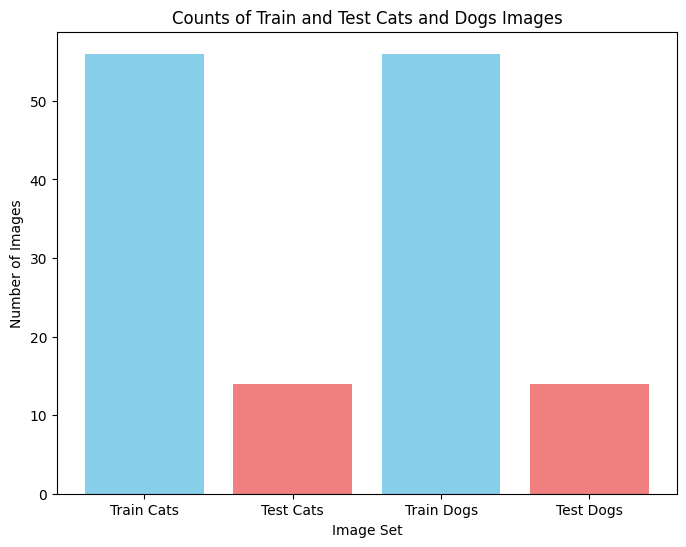

In [ ]:
# prompt: # plot the bar graph for the counts of train and test cats and dogs images

import matplotlib.pyplot as plt
# Count the number of images in each set
train_cats_count = len(cats_train_df)
test_cats_count = len(cats_test_df)
train_dogs_count = len(dogs_train_df)
test_dogs_count = len(dogs_test_df)

# Create the bar graph
labels = ['Train Cats', 'Test Cats', 'Train Dogs', 'Test Dogs']
counts = [train_cats_count, test_cats_count, train_dogs_count, test_dogs_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
plt.title('Counts of Train and Test Cats and Dogs Images')
plt.xlabel('Image Set')
plt.ylabel('Number of Images')
plt.show()


* Create Custom Function using Augly which will perform multiple random data augmentation according to input. (At least 10 data augmentation needs to be added like rotate, cropping, blur …)

In [ ]:
import random
import augly.image as imaugs
from PIL import Image

In [ ]:
# Function to perform random data augmentation
def random_augmentations(input_image: Image.Image):
    # List of augmentations with their functions and relevant parameters
    augmentations = [
        ("rotate", imaugs.rotate, {"degrees": 45}),  # Rotate with a degree parameter
        ("clip_image_size", imaugs.clip_image_size, {"min_resolution": 256, "max_resolution": 1024}),  # Clip image size
        ("grayscale", imaugs.grayscale, {"mode": "luminosity"}),  # Convert to grayscale (luminosity mode)
        ("crop", imaugs.crop, {"x1": 0.1, "y1": 0.1, "x2": 0.9, "y2": 0.9}),  # Crop the image
        ("hflip", imaugs.hflip, {}),  # Horizontal flip
        ("vflip", imaugs.vflip, {}),  # Vertical flip
        ("random_noise", imaugs.random_noise, {"mean": 0, "var": 0.05}),  # Add random noise
        ("skew", imaugs.skew, {}),  # Skew the image
        ("blur", imaugs.blur, {"radius": 5.0}),  # Apply blur with a radius
        ("color_jitter", imaugs.color_jitter, {"brightness_factor": 1.2, "contrast_factor": 1.5}),  # Apply color jitter
    ]

    # Randomly select the augmentations to apply
    selected_augmentations = random.sample(augmentations, 3)

    # Apply selected augmentations to the input image
    augmented_image = input_image
    applied_augs = []  # List to keep track of the applied augmentations
    for aug_name, aug_func, params in selected_augmentations:
        try:
            augmented_image = aug_func(augmented_image, **params)  # Apply the function with its parameters
            applied_augs.append(aug_name)  # Track the applied augmentation name
        except Exception as e:
            print(f"Error applying augmentation {aug_name}: {e}")
            continue  # Skip this augmentation if there is an error

    return augmented_image, applied_augs

In [ ]:
# Extract image file paths from the 'filepath' column
cats_train_image_paths = cats_train_df['cats_filepath'].tolist()  # List of image file paths
cats_train_image_names = cats_train_df['cats_filename'].tolist()  # List of image names
dogs_train_image_paths = dogs_train_df['dogs_filepath'].tolist()  # List of image file paths
dogs_train_image_names = dogs_train_df['dogs_filename'].tolist()  # List of image names


# Specify the save directory
save_dir = "./Augmented_Images"

In [ ]:
len(cats_train_image_paths),len(dogs_train_image_paths),len(cats_train_image_names),len(dogs_train_image_names)

(56, 56, 56, 56)

In [68]:
# Function to perform augmentations and generate the new dataset
def augment_train_set(train_image_paths, train_image_names, save_dir):
    augmented_images = []  # List to store augmented images

    # Create main folder and subfolders for cats and dogs if they don't exist
    cats_folder = os.path.join(save_dir, "augmented_cats")
    dogs_folder = os.path.join(save_dir, "augmented_dogs")

    # Loop through the original train image paths and augment them
    for idx, image_path in enumerate(train_image_paths):
        # Load the image from the file path
        img = Image.open(image_path)
        image_name = train_image_names[idx]  # Get the image name

        # Augment the image 3 times in a sequence: crop -> rotate -> blur
        augmented_img_1, augs_1 = random_augmentations(img)  # First augmentated Image
        # print(f"{image_name} image Augmented with the augmentations {', '.join(augs_1)}")
        augmented_img_2, augs_2 = random_augmentations(img)  # Second augmentated Image
        # print(f"{image_name} image Augmented with the augmentations {', '.join(augs_2)}")

        augmented_images.extend([augmented_img_1, augmented_img_2])  # Add augmented images

    # Determine the subfolder based on the image's name (e.g., if it's a cat or dog image)
        if 'cat' in image_name.lower():  # Assuming the image name contains 'cat' for cat images
            save_folder = cats_folder
        elif 'dog' in image_name.lower():  # Assuming the image name contains 'dog' for dog images
            save_folder = dogs_folder
        else:
            save_folder = os.path.join(save_dir, "augmented_others")  # For other images, create a generic folder

        # Ensure the subfolder exists
        os.makedirs(save_folder, exist_ok=True)

        # Save the augmented images with new names
        augmented_img_1.save(os.path.join(save_folder, f"{image_name}_augmented_1.jpg"))
        augmented_img_2.save(os.path.join(save_folder, f"{image_name}_augmented_2.jpg"))

    # The augmented images should be twice the number of original train set images
    return augmented_images

In [69]:
# Augment the training set
print("Performing Augmentations on Cats Images.-----")
augmented_cats_train_set = augment_train_set(cats_train_image_paths, cats_train_image_names, save_dir)
augmented_dogs_train_set = augment_train_set(dogs_train_image_paths, dogs_train_image_names, save_dir)

# Print the number of augmented images
print(f"Number of augmented images: {len(augmented_cats_train_set) , len(augmented_dogs_train_set)}")
print(augmented_cats_train_set)
print(augmented_dogs_train_set)

Number of augmented images: (112, 112)
[<PIL.Image.Image image mode=RGB size=39x26 at 0x7A456998C210>, <PIL.Image.Image image mode=RGB size=489x327 at 0x7A4569AB6210>, <PIL.Image.Image image mode=RGB size=285x177 at 0x7A4569B0D050>, <PIL.Image.Image image mode=RGB size=40x25 at 0x7A456995AFD0>, <PIL.Image.Image image mode=RGB size=1400x1400 at 0x7A4569AA1F50>, <PIL.Image.Image image mode=RGB size=1400x1400 at 0x7A4569B45090>, <PIL.Image.Image image mode=RGB size=39x26 at 0x7A4569A67890>, <PIL.Image.Image image mode=RGB size=39x26 at 0x7A4569B41510>, <PIL.Image.Image image mode=RGB size=39x26 at 0x7A4569B69AD0>, <PIL.Image.Image image mode=RGB size=259x260 at 0x7A4569AA5290>, <PIL.Image.Image image mode=RGB size=124x123 at 0x7A4569AA5A50>, <PIL.Image.Image image mode=RGB size=41x24 at 0x7A4569972F10>, <PIL.Image.Image image mode=RGB size=136x136 at 0x7A456995C110>, <PIL.Image.Image image mode=RGB size=136x136 at 0x7A456995F290>, <PIL.Image.Image image mode=RGB size=40x25 at 0x7A4569AA7F

In [78]:
# Define the folder path
cats_folder = "/content/Augmented_Images/augmented_cats"
dogs_folder = "/content/Augmented_Images/augmented_dogs"

folders = [cats_folder, dogs_folder]

for folder in folders:
  # List all files in the folder
  files_in_folder = os.listdir(folder)

  # Filter out directories and count only files (optional, if you want to exclude subdirectories)
  files_only = [f for f in files_in_folder if os.path.isfile(os.path.join(folder, f))]

  # Get the length (number of files) in the folder
  folder_name = os.path.basename(folder)
  folder_length = len(files_only)

  # Print the result
  print(f"Number of files in the folder {folder_name}: {folder_length}")


Number of files in the folder augmented_cats: 112
Number of files in the folder augmented_dogs: 112


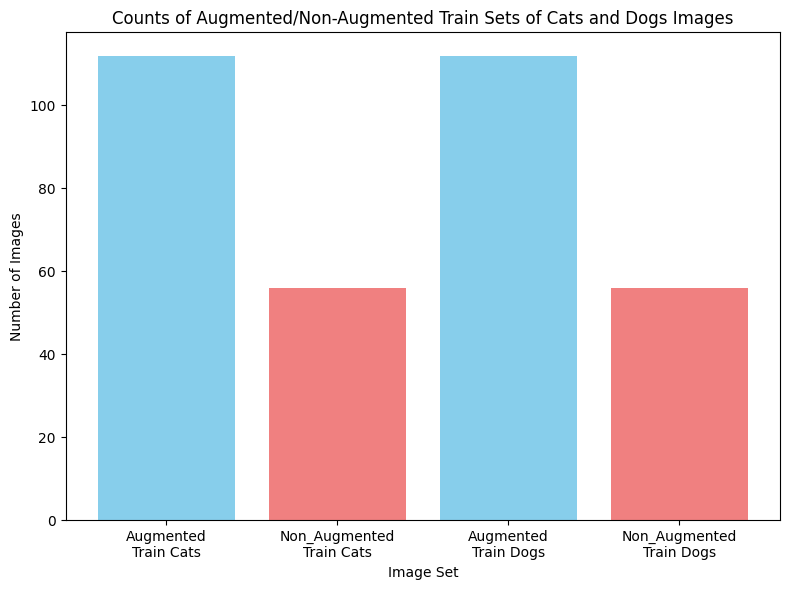

In [86]:
import matplotlib.pyplot as plt

# Count the number of images in each set
aug_train_cats_count = len(augmented_cats_train_set)
aug_train_dogs_count = len(augmented_dogs_train_set)
non_aug_train_cats_count = len(cats_train_df)
non_aug_train_dogs_count = len(dogs_train_df)

# Create the bar graph
labels = ['''Augmented
Train Cats''',
          '''Non_Augmented
Train Cats''',
          '''Augmented
Train Dogs''',
          '''Non_Augmented
Train Dogs'''
          ]

counts = [aug_train_cats_count, non_aug_train_cats_count, aug_train_dogs_count, non_aug_train_dogs_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])

# Adjust the title and labels
plt.title('Counts of Augmented/Non-Augmented Train Sets of Cats and Dogs Images')
plt.xlabel('Image Set')
plt.ylabel('Number of Images')

# Show the plot
plt.tight_layout()  # To ensure the plot fits well within the figure area
plt.show()
